In [1]:
import json
import pickle

In [2]:
def get_friendly_name(param_name):
    return param_name#.split(".")[-2]

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import defaultdict
import os

def plot_function(base_string, title, is_mup, max_time=5, d_models=[256, 512, 1024, 2048], n_heads=[16], optimizer="", include_only=None, legend=True, y_maxes=None):

    
    fig, axs = plt.subplots(nrows=1, ncols=max_time, figsize=(8 * max_time, 8))
    for ax, time_step in zip(axs, range(max_time)):
        print(ax)
        per_layer_activations = defaultdict(list)

        for d_model in d_models:
            for n_head in n_heads:
                activation_json_file = os.path.join(base_string.format(d_model, n_head, optimizer), f"batch_{time_step}.pickle")

               # Open the JSON file
                with open(activation_json_file, "rb") as f:
                    print(activation_json_file)
                    data = pickle.load(f) 

                    print(data)
                    for param_name, val in data.items():
                        per_layer_activations[param_name].append(val)
        print(per_layer_activations)
    

        ax.set_title(title.format(time_step))
        cmap  = cm.get_cmap('viridis', len(per_layer_activations))
        for i, (param_name, scaled_versions) in enumerate(per_layer_activations.items()):
            if include_only:
                if include_only != param_name:
                    continue
                # continue
            ax.plot(d_models, scaled_versions, label=get_friendly_name(param_name))
        ax.set_xlabel("d_model")
        ax.set_ylabel("L1 Norm")
        ax.loglog(base=2)
        print(time_step)
        if y_maxes:
            ax.set_ylim([2**-2, 2**y_maxes[time_step]])
    
    if legend:
        axs[0].legend()

    plot_title = f"activations_{'mup' if is_mup else 'non_mup'}_max_time_{max_time}.png"

    # plt.savefig(plot_title, dpi=300)

Axes(0.125,0.11;0.133621x0.77)
/root/small_2_layers_mup_official_scaled_d_model_256_n_head_16/batch_0.pickle
{'activations/l1_norm/model._fsdp_wrapped_module.transformer.wte_output': 0.07049560546875, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.wpe_output': 0.0703125, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.emb_drop_output': 0.09967041015625, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.blocks.0._fsdp_wrapped_module.norm_1_output': 0.796875, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.blocks.0._fsdp_wrapped_module.attn.Wqkv_output': 1.125, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.blocks.0._fsdp_wrapped_module.attn.out_proj_output': 0.2840576171875, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.blocks.0._fsdp_wrapped_module.attn_output': 0.283203125, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.blocks.0._fsdp_wrapped_module.resid_attn_dropout_output': 0.2840576171875, 'acti

/tmp/ipykernel_31605/482900279.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap  = cm.get_cmap('viridis', len(per_layer_activations))


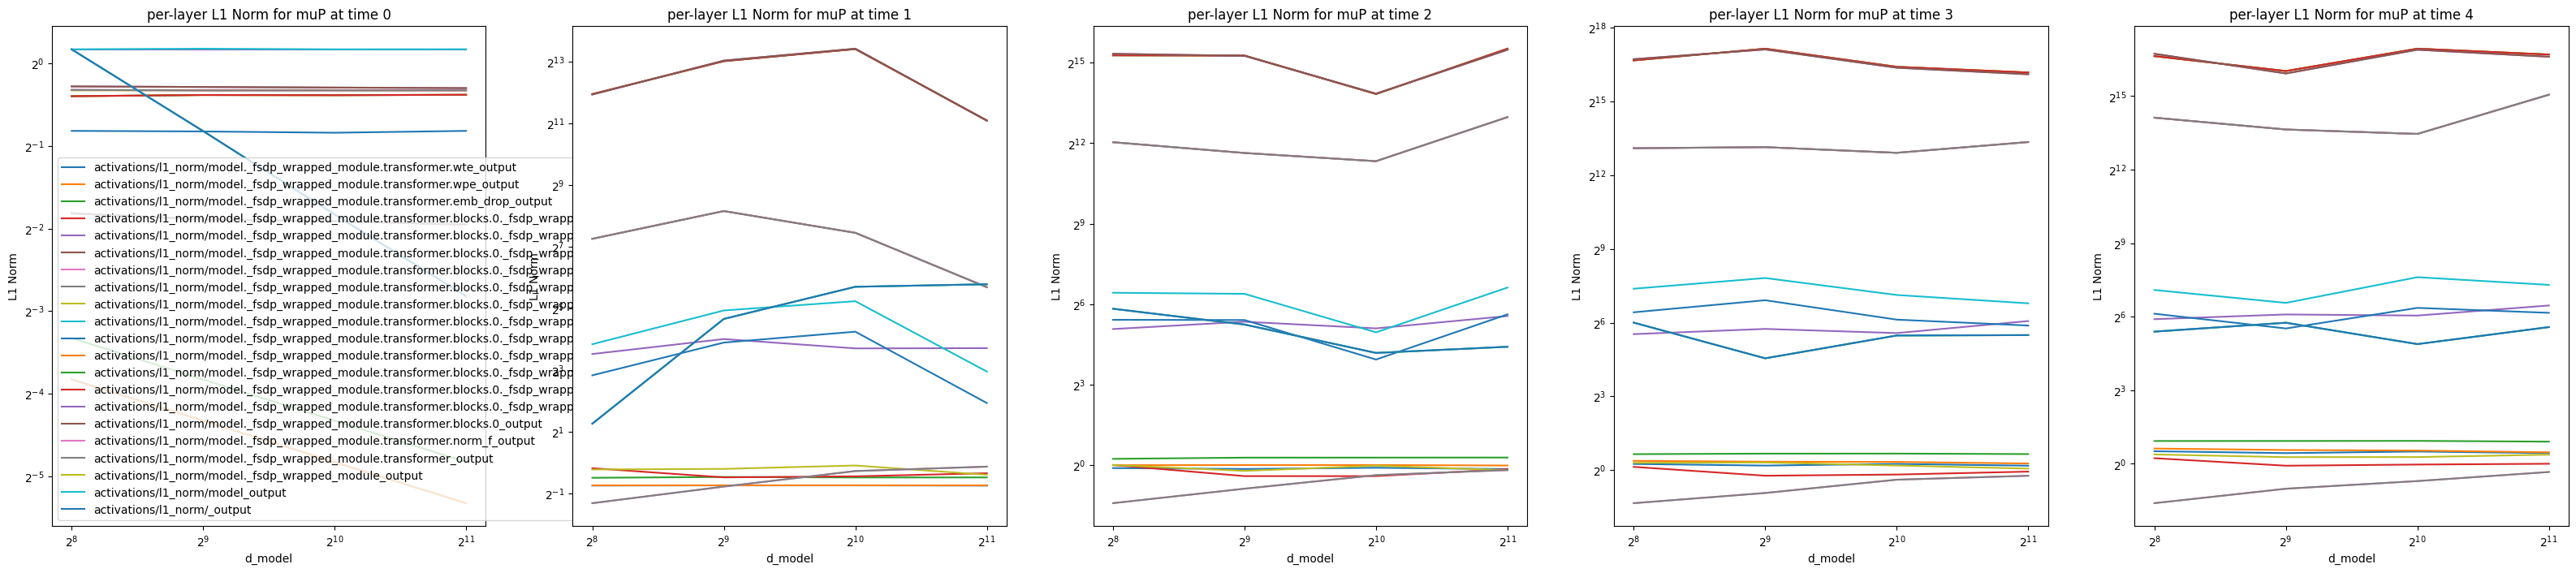

In [7]:
plot_function("/root/small_2_layers_mup_official_scaled_d_model_{}_n_head_{}", "per-layer L1 Norm for muP at time {}", is_mup=True)

Axes(0.125,0.11;0.133621x0.77)
/root/small_2_layers_no_mup_scaled_d_model_256_n_head_16/batch_0.pickle
{'activations/l1_norm/model._fsdp_wrapped_module.transformer.wte_output': 0.07049560546875, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.wpe_output': 0.0703125, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.emb_drop_output': 0.09967041015625, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.blocks.0._fsdp_wrapped_module.norm_1_output': 0.796875, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.blocks.0._fsdp_wrapped_module.attn.Wqkv_output': 1.125, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.blocks.0._fsdp_wrapped_module.attn.out_proj_output': 0.2840576171875, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.blocks.0._fsdp_wrapped_module.attn_output': 0.283203125, 'activations/l1_norm/model._fsdp_wrapped_module.transformer.blocks.0._fsdp_wrapped_module.resid_attn_dropout_output': 0.2840576171875, 'activation

/tmp/ipykernel_31605/482900279.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap  = cm.get_cmap('viridis', len(per_layer_activations))


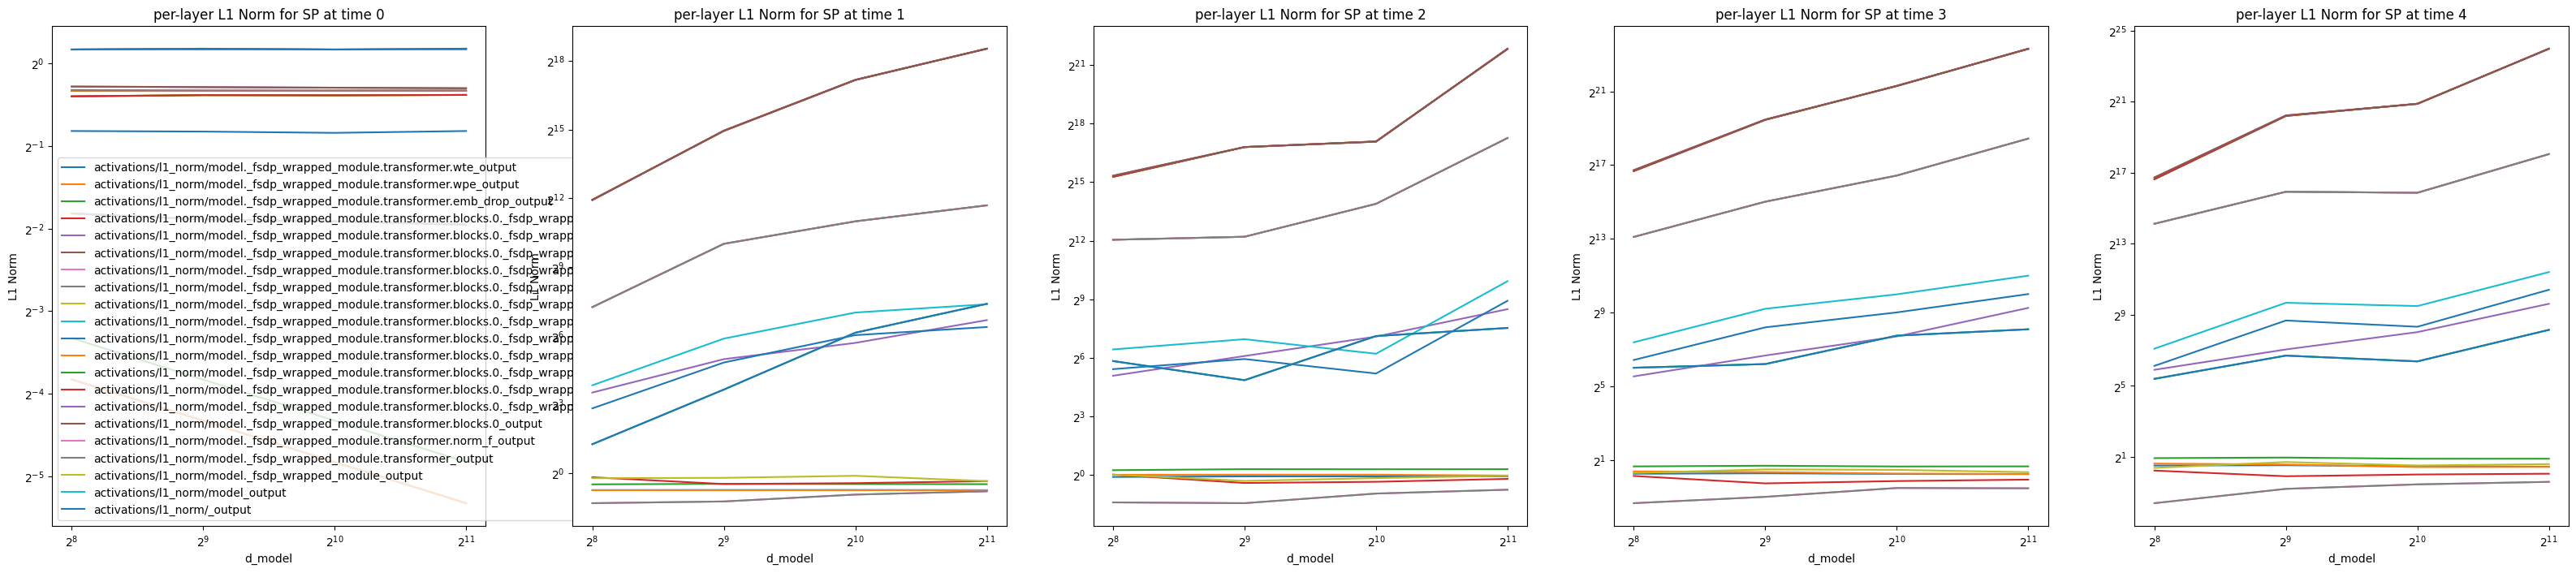

In [9]:
plot_function("/root/small_2_layers_no_mup_scaled_d_model_{}_n_head_{}", "per-layer L1 Norm for SP at time {}", is_mup=False)

In [ ]:
plot_function("/root/large_12_layers_mup_scaled_d_model_{}_n_head_{}_optimizer_{}", "per-layer L1 Norm for muP library plot at time with 125M at time with lion w {}", d_models=[192, 384, 768], n_heads=[12],  optimizer="mup_decoupled_lionw", is_mup=True, legend=False)

In [ ]:
plot_function("/root/large_12_layers_no_mup_scaled_d_model_{}_n_head_{}_optimizer_{}", "per-layer L1 Norm SP plot at time with 125M with lion w at time {}", d_models=[192, 384, 768, 1536], n_heads=[12],  optimizer="decoupled_lionw", is_mup=False, legend=False)